<a href="https://colab.research.google.com/github/Soyunasilla/Gdocker/blob/main/DS_C3SC1_GABRIEL_MEDINA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Genera una libreta en Google Colab, cuya estructura esté basada en los análisis solicitados.
2. Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Happiness = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TLG/DS_C3SC1/Happiness_report.csv')
Metada= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TLG/DS_C3SC1/Metadata.csv')
Happiness.head()
#Metada.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


3. A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.

In [3]:
mexico = Happiness[Happiness['Country or region']=='Mexico']
mexico.set_index('Country or region', inplace=True)
mexico.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4. Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

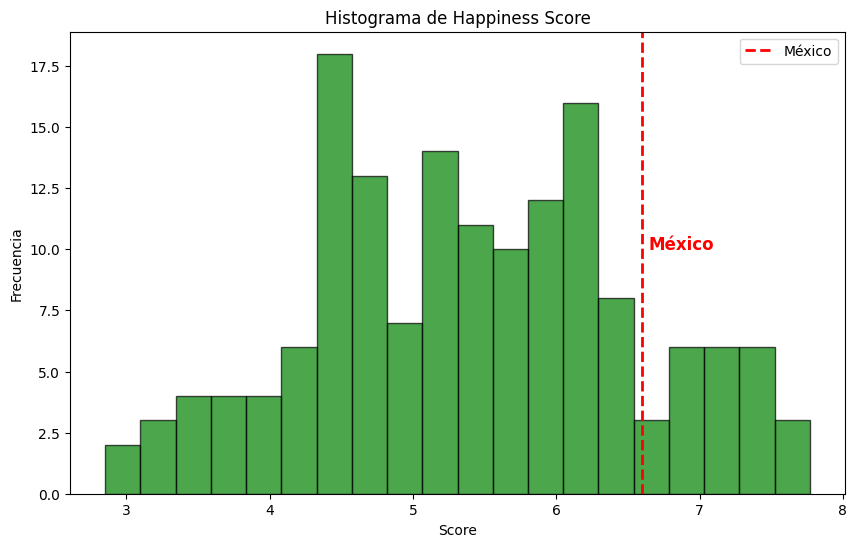

In [4]:
#Filtra de Score para México
mexico_score = Happiness[Happiness["Country or region"] == "Mexico"]["Score"].values[0]

# Crear histograma
plt.figure(figsize=(10, 6))
plt.hist(Happiness["Score"], bins=20, color='green', edgecolor='black', alpha=0.7)

#Agregar línea
plt.axvline(mexico_score, color='red', linestyle='dashed', linewidth=2, label='México')
plt.text(mexico_score + 0.05, 10, 'México', color='red', fontsize=12, fontweight='bold')

plt.xlabel("Score")
plt.ylabel("Frecuencia")
plt.title("Histograma de Happiness Score")
plt.legend()

plt.show()

5.Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.

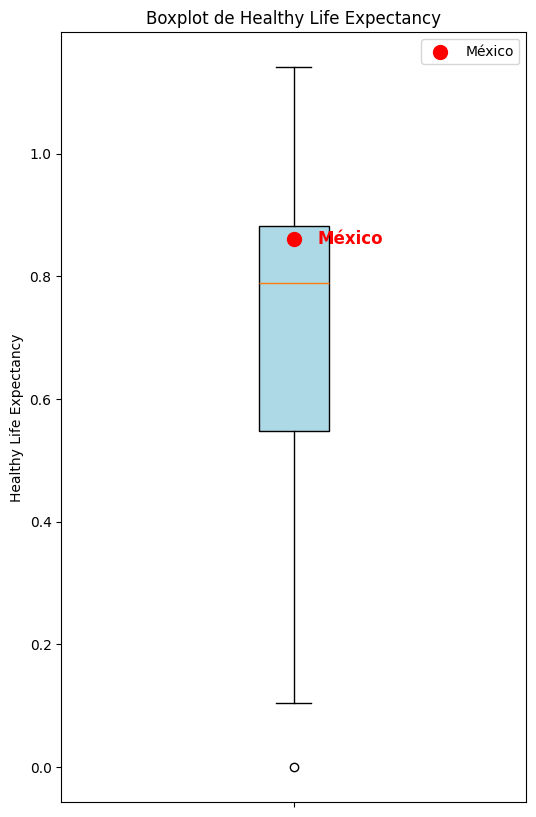

In [5]:
# Obtener el valor de "Healthy life expectancy" para México
mexico_health = Happiness[Happiness["Country or region"] == "Mexico"]["Healthy life expectancy"].values[0]

# Crear boxplot
plt.figure(figsize=(6, 10))
plt.boxplot(Happiness["Healthy life expectancy"], vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))

# Agregar una anotación para México
plt.scatter(1, mexico_health, color='red', s=100, label="México", zorder=3)
plt.text(1.05, mexico_health, "México", color='red', fontsize=12, fontweight='bold', verticalalignment='center')

# Configurar etiquetas y título
plt.ylabel("Healthy Life Expectancy")
plt.title("Boxplot de Healthy Life Expectancy")
plt.xticks([1], [""])
plt.legend()

plt.show()

6. Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México.

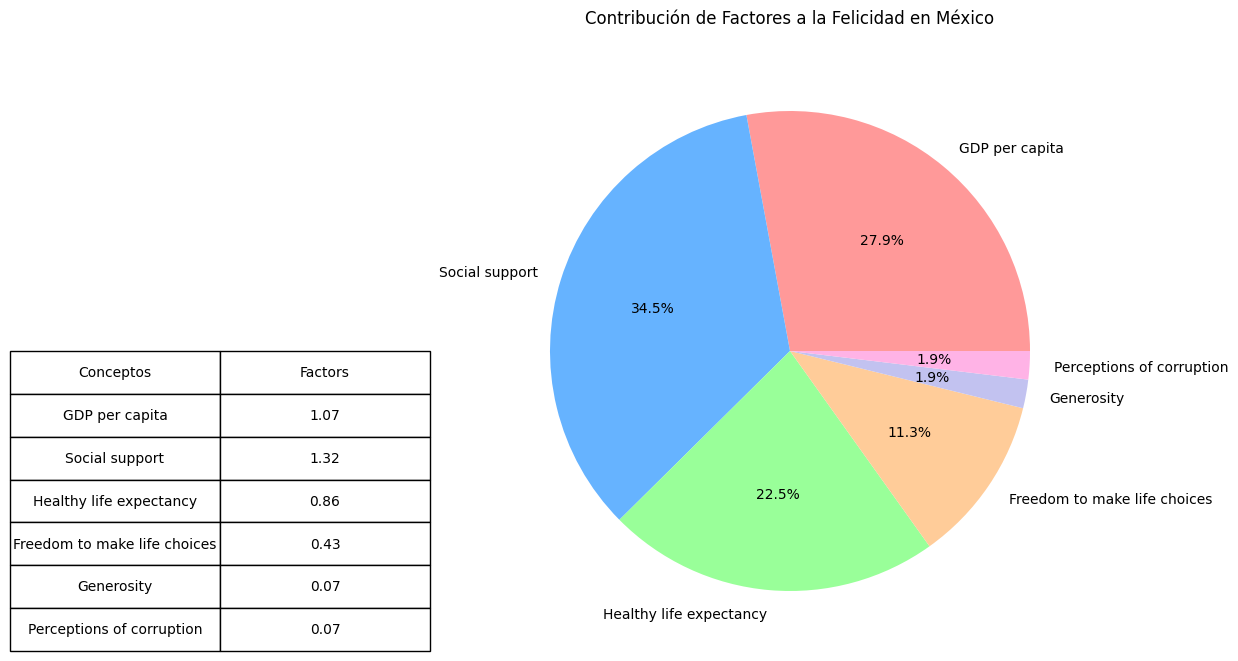

In [6]:

# Definir las variables que contribuyen a la felicidad en México
factores = ["GDP per capita", "Social support", "Healthy life expectancy",
            "Freedom to make life choices", "Generosity", "Perceptions of corruption"]

# Obtener los valores de estas variables para México
valores_mexico = Happiness[Happiness["Country or region"] == "Mexico"][factores].values[0]

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 8))

# Crear la tabla en formato vertical y ubicarla a la izquierda
tabla_datos = [[factor, round(valor, 2)] for factor, valor in zip(factores, valores_mexico)]
tabla = plt.table(cellText=tabla_datos,
                  colLabels=["Conceptos", "Factors"],
                  cellLoc='center',
                  loc='center left',  # Ubica la tabla a la izquierda
                  bbox=[-0.8, 0, 0.7, .5])  # Ajuste para mover más la tabla a la izquierda

tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1, 1.5)  # Ajustar tamaño de la tabla

# Crear la gráfica circular
ax.pie(valores_mexico, labels=factores, autopct='%1.1f%%', startangle=0,
       colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0", "#ffb3e6"])

# Agregar título
ax.set_title("Contribución de Factores a la Felicidad en México", pad=20)

# Ajustar márgenes para que la tabla y la gráfica no se superpongan
plt.subplots_adjust(left=0.4, right=1.0)  # Mueve la tabla más a la izquierda

# Mostrar la gráfica
plt.show()

Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores. Ejemplo:


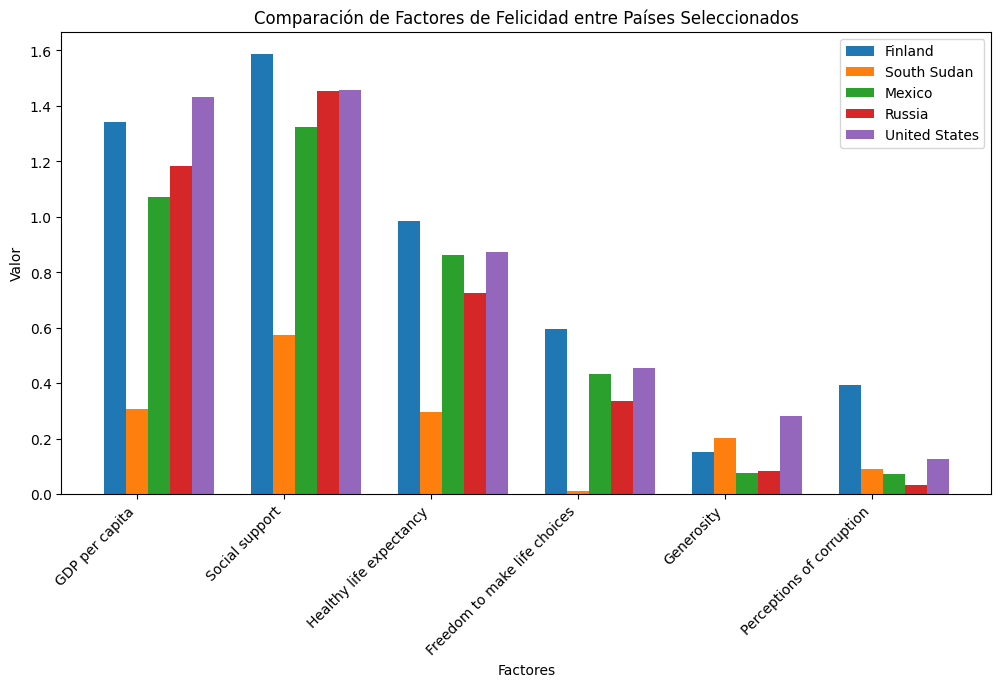

In [7]:
#Voy a seleccionar Rusia y Usa por los temas geopoliticos de ahora junto con el mínimo y máximo
pais_mas_feliz = Happiness[Happiness["Score"] == Happiness["Score"].max()]
pais_menos_feliz = Happiness[Happiness["Score"] == Happiness["Score"].min()]
mexico = Happiness[Happiness["Country or region"] == "Mexico"]
rusia = Happiness[Happiness["Country or region"] == "Russia"]
usa = Happiness[Happiness["Country or region"] == "United States"]

# Concatenar los DataFrames en uno solo
df_seleccion = pd.concat([pais_mas_feliz, pais_menos_feliz, mexico, rusia, usa])

factores = ["GDP per capita", "Social support", "Healthy life expectancy",
            "Freedom to make life choices", "Generosity", "Perceptions of corruption"]

valores = df_seleccion[factores].values
paises = df_seleccion["Country or region"].values

#Configurar la gráfica
x = np.arange(len(factores))
width = 0.15

fig, ax = plt.subplots(figsize=(12, 6))


for i, (pais, valores_pais) in enumerate(zip(paises, valores),0):
    ax.bar(x + i * width, valores_pais, width, label=pais)

ax.set_xlabel("Factores")
ax.set_ylabel("Valor")
ax.set_title("Comparación de Factores de Felicidad entre Países Seleccionados")
ax.set_xticks(x + width)
ax.set_xticklabels(factores, rotation=45, ha="right")
ax.legend()


plt.show()

Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

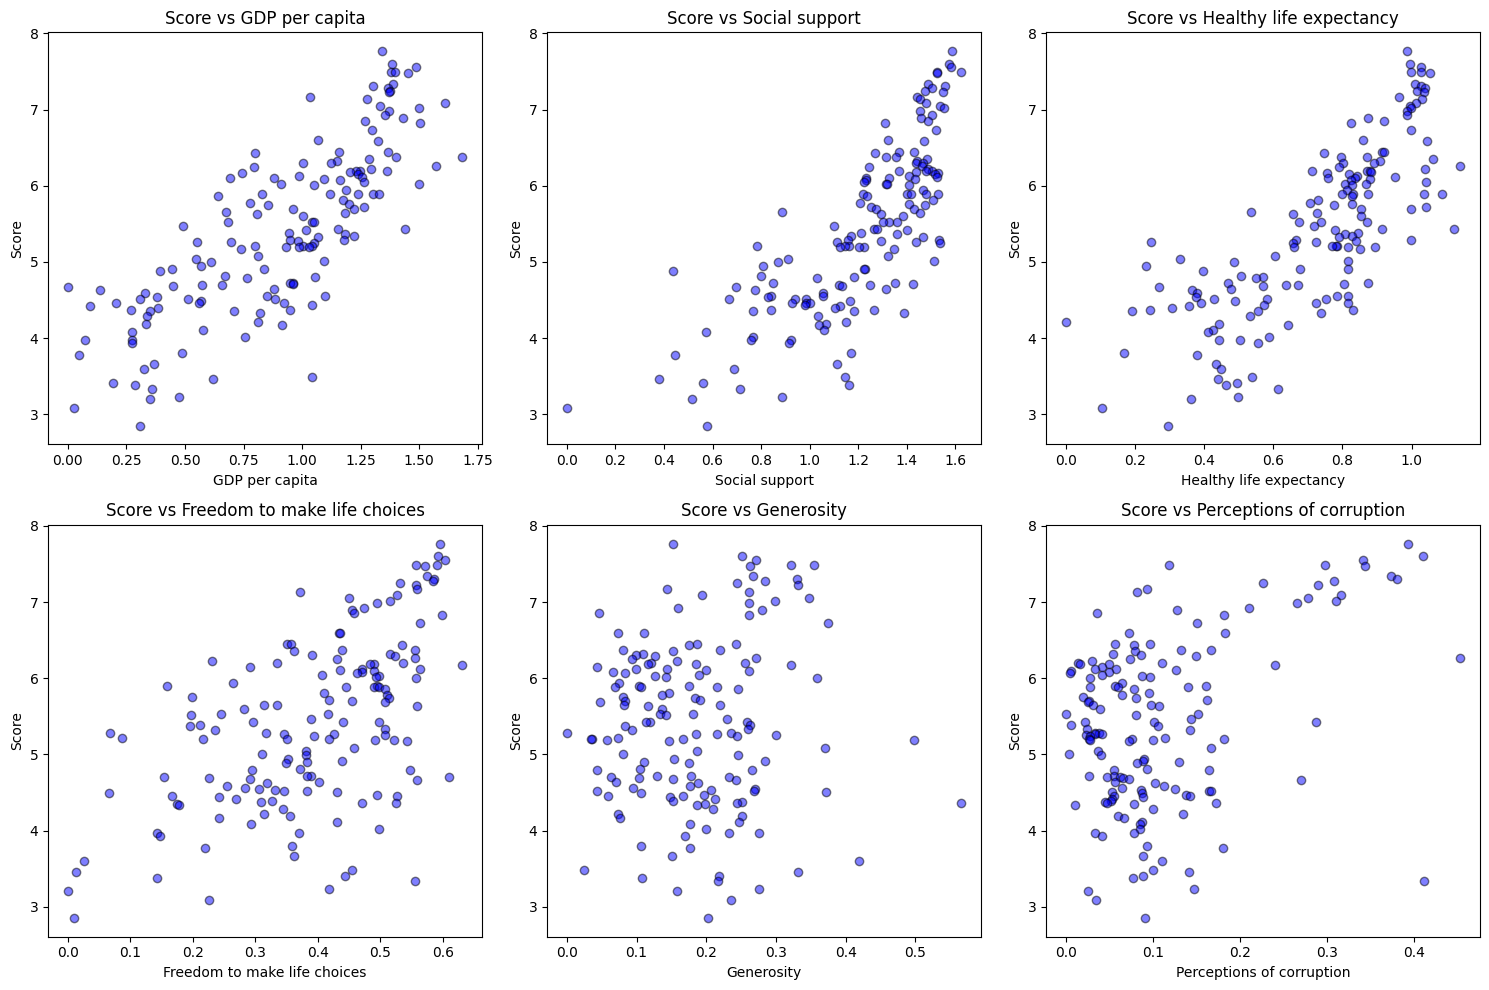

In [8]:
#matriz de subgráficas de 2 x 3
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

#scatter plot
for i, factor in enumerate(factores):
    row, col = divmod(i, 3)  # Determinar la fila y la columna en la matriz de subgráficas
    axes[row, col].scatter(Happiness[factor], Happiness["Score"], alpha=0.5, color='blue', edgecolors='black')
    axes[row, col].set_xlabel(factor)
    axes[row, col].set_ylabel("Score")
    axes[row, col].set_title(f"Score vs {factor}")

plt.tight_layout()
plt.show()

Comprueba lo anterior con un heatmap donde incluyas los índices de correlación. Ejemplo:


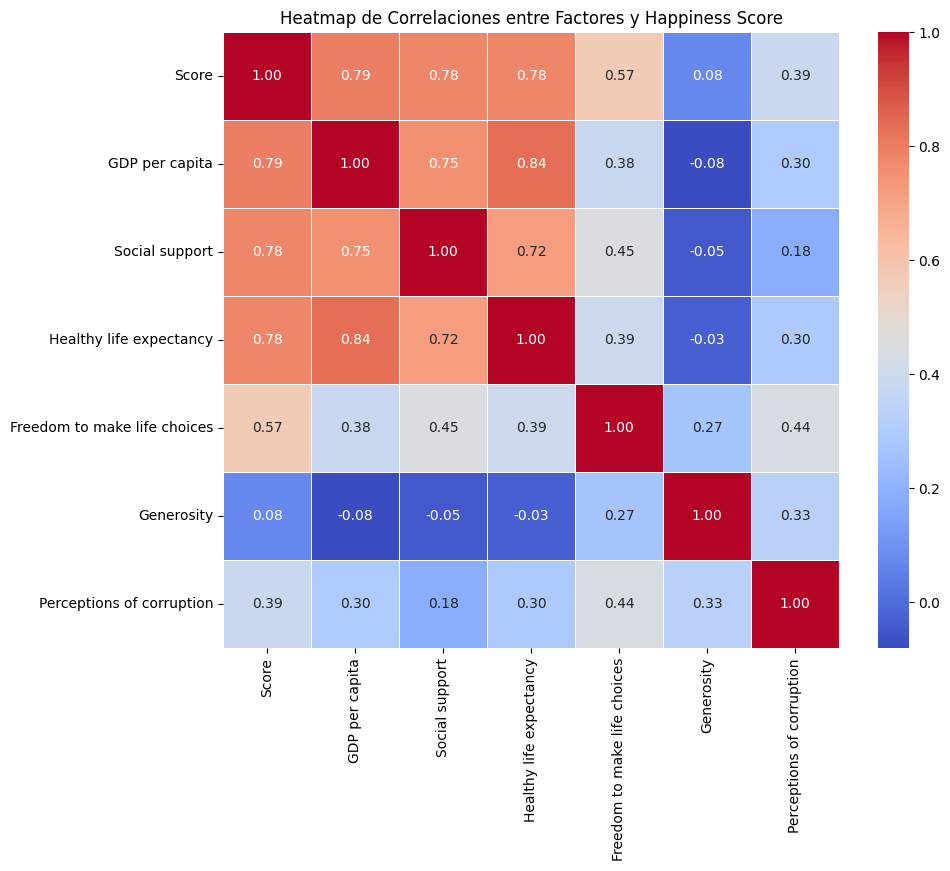

In [9]:

#Columnas de Correlación
factores_correlacion = ["Score", "GDP per capita", "Social support", "Healthy life expectancy",
                        "Freedom to make life choices", "Generosity", "Perceptions of corruption"]

#función de correlación
correlacion = Happiness[factores_correlacion].corr()

#Crear el heatmap con los valores de correlación en cada cuadro
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)

plt.title("Heatmap de Correlaciones entre Factores y Happiness Score")
plt.show()


Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

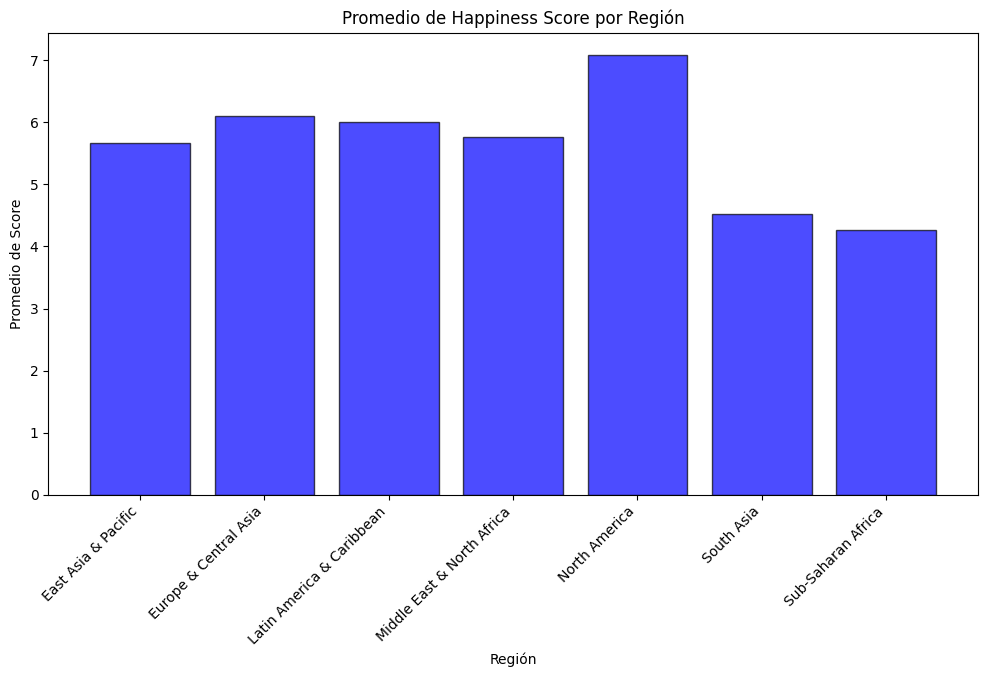

In [20]:
#Cruce de Happiness y Metada usando "TableName" y "Country or region"
df_combinado = Happiness.merge(Metada, left_on="Country or region", right_on="TableName", how="inner")

#Agrupar el promedio de "Score"
region_score_mean = df_combinado.groupby("Region")["Score"].mean()

#gráfica de barras
plt.figure(figsize=(12, 6))
plt.bar(region_score_mean.index, region_score_mean.values, color='blue', alpha=0.7, edgecolor='black')

plt.xlabel("Región")
plt.ylabel("Promedio de Score")
plt.title("Promedio de Happiness Score por Región")
plt.xticks(rotation=45, ha="right")

plt.show()


Descarga tu script (archivo .ipynb) y nómbralo de la siguiente manera: DS_C3_SC1_NOMBRE.
Sube el archivo a Github.
Coloca en la plataforma el enlace generado como evidencia de tu actividad.